# Linear Regression

In [37]:
# Import libraries
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import seaborn as sns

%matplotlib inline 
sns.set()

In [2]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

In [28]:
import fix_yahoo_finance as yf
from datetime import datetime
start="2017-01-01"
end="2017-12-31"
#end=datetime.now().strftime ("%Y-%m-%d")

In [29]:
MERCK = yf.download('MERCK.NS', start=start, end=end)
asset = MERCK['Close']

NIFTY50 = yf.download('^NSEI', start=start, end=end)
NIFTY50 = NIFTY50[NIFTY50.index <= end]
benchmark = NIFTY50['Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [31]:
asset

Date
2017-01-02     981.349976
2017-01-03     997.299988
2017-01-04     991.099976
2017-01-05     988.099976
2017-01-06     983.500000
2017-01-09     978.650024
2017-01-10     968.700012
2017-01-11     974.099976
2017-01-12     959.549988
2017-01-13     955.349976
2017-01-16     967.750000
2017-01-17     966.450012
2017-01-18     969.750000
2017-01-19     953.400024
2017-01-20     946.400024
2017-01-23     940.700012
2017-01-24     943.849976
2017-01-25     939.849976
2017-01-27     935.950012
2017-01-30     958.200012
2017-01-31     941.049988
2017-02-01     938.700012
2017-02-02     987.000000
2017-02-03     985.250000
2017-02-06     981.700012
2017-02-07     985.900024
2017-02-08     983.549988
2017-02-09     981.750000
2017-02-10     980.650024
2017-02-13     983.150024
                 ...     
2017-11-17    1168.099976
2017-11-20    1168.449951
2017-11-21    1159.500000
2017-11-22    1161.150024
2017-11-23    1149.500000
2017-11-24    1147.349976
2017-11-27    1141.699951
2017-11

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     5.698
Date:                Wed, 13 Mar 2019   Prob (F-statistic):             0.0177
Time:                        17:21:49   Log-Likelihood:                 640.20
No. Observations:                 247   AIC:                            -1276.
Df Residuals:                     245   BIC:                            -1269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      0.653      0.514      -0.002       0.003
x1             0.4859      0.204      2.387      0.018       0.085       0.887
==============================================================================
Omnibus:                       41.623   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.912
Skew:                           0.820   Prob(JB):                     2.99e-20
Kurtosis:                       5.459   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

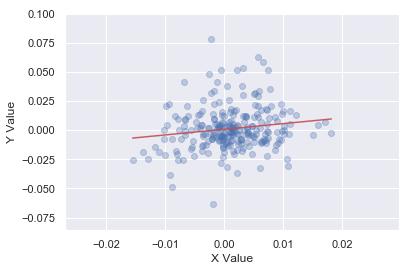

In [39]:
# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

linreg(r_b.values, r_a.values)

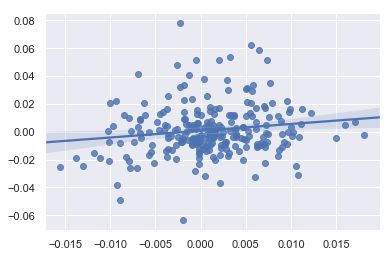

In [42]:
#  95% confidence intervals for the regression line
sns.regplot(r_b.values, r_a.values);

## Knowing Parameters vs. Estimates

One way to get a sense of how stable your parameter estimates are is to estimate them using a rolling window of data and see how much variance there is in the estimates.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9967
Date:                Wed, 13 Mar 2019   Prob (F-statistic):              0.321
Time:                        17:19:02   Log-Likelihood:                -19.526
No. Observations:                 100   AIC:                             43.05
Df Residuals:                      98   BIC:                             48.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5626      0.062      9.077      0.000       0.440       0.686
x1            -0.1049      0.105     -0.998      0.321      -0.313       0.104
==============================================================================
Omnibus:                       35.744   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.134
Skew:                           0.006   Prob(JB):                       0.0466
Kurtosis:                       1.787   Cond. No.                         4.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

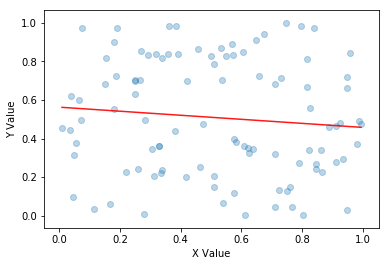

In [33]:
X = np.random.rand(100)
Y = np.random.rand(100)
linreg(X, Y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           1.13e-24
Time:                        17:19:36   Log-Likelihood:                 23.102
No. Observations:                 100   AIC:                            -42.20
Df Residuals:                      98   BIC:                            -36.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0476      0.040      1.176      0.242      -0.033       0.128
x1             0.9453      0.069     13.785      0.000       0.809       1.081
==============================================================================
Omnibus:                        1.288   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                1.155
Skew:                           0.089   Prob(JB):                        0.561
Kurtosis:                       2.505   Cond. No.                         4.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

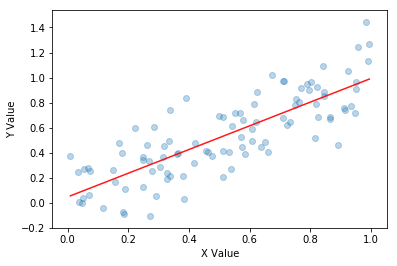

In [34]:
# Generate ys correlated with xs by adding normally-destributed errors
Y = X + 0.2*np.random.randn(100)

linreg(X,Y)